## **[영문 분석 + 워드클라우드]**

### **영문 문서 제목의 키워드 분석하기**

### **분석 미리보기**

* 목표: 검색한 영문 학술 문서의 제목에서 빈도 분석을 수행하여 키워드를 도출한다.
* 핵심 개념: 텍스트 분석, 전처리, 토큰화, 불용어, 어간 추출, 워드클라우드
* 데이터 수집: 'Big data'로 검색한 영문 학술 문서 제목(학술연구정보서비스에서 수집)
* 데이터 준비:
    1. 데이터 조합: pandas.concat()
    2. 데이터 정제: re 정규식, stopwords.words("english")
    3. 데이터 변환: word_tokenize(), lower(), WordNetLemmatize()
* 데이터 탐색 및 모델링:
    1. 단어 빈도 검색: Counter()
    2. 단어 빈도 히스토그램: matplotlib.pyplot

### **핵심 개념 이해하기**

비정형 빅데이터 분석이 가능해지면서 자연어 처리(natural language processing)가 중요한 분석 대상으로 떠오르고 있다.
자연어 처리란 음성 또는 텍스트 형태의 자연어에서 정보를 추출하여 분석하는 것이다.
영문 텍스트에서 단어를 분석하여 키워드를 추출하고 시각화를 수행하는 이 프로젝트도 자연어 처리 방법 중 하나이다.

이번 프로젝트에서 수행할 영문 텍스트 분석은 영문 데이터에서 분석할 특징(feature)을 선정한 후 컴퓨터가 처리할 수 있는 벡터(Vector) 형태로 변환하고
분석 기법을 적용하여 필요한 정보를 추출하는 과정으로 수행한다.
이때 단어 빈도 분석 결과는 히스토그램으로 확인하고 워드클라우드로 시각화하여 키워드를 추출한다.

#### **텍스트 분석**

텍스트 분석(text analysis)은 자연어 처리와 데이터 마이닝이 결합하여 발전된 분야로 비정형 텍스트 데이터에서 정보를 추출하여 분석하는 방법이다.
텍스트 분석 기법은 단어에 대한 분석을 기본으로 허며, 텍스트 분류(text classification), 텍스트 군집화(text clustering), 감성 분석
(sentiment analysis) 등이 있다.

### **전처리**

전처리(preprocessing)는 분석 작업의 정확도를 높이기 위해 분석에 사용할 데이터를 먼저 정리하고 변환하는 작업이다.
전처리에서는 필요에 따라 다음과 같은 작업을 수행한다.

* 정체(classing): 불필요한 기호나 문자를 제거하는 작업으로 주로 정규식을 이용하여 수행한다.
* 정규화(normalization): 정제와 같은 의미지만 형태가 다른 단어를 하나의 형태로 통합하는 작업으로 대/소 문자 통합, 유사 의미의 단어 통합 등이 있다.
* 토큰화(tokenization): 데이터를 토큰으로 정한 기본 단위로 분리하는 작업이다. 문장을 기준으로 분리하는 문장 토큰화, 단어를 기준으로 분리하는 단어 토큰화 등이 있다.
* 불용어(stopword) 제거: 의미가 있는 토큰을 선별하기 위해 조사, 관사, 접미사처럼 분석할 의미가 없는 토큰인 불용어(stopword)를 제거한다.
* 어간 추출(semming): 단어에서 시제, 단/복수, 진행형 등을 나타내는 다양한 어간(stem)을 잘라내어 단어의 형태를 일반화한다.
* 표제어 추출(lemmatization): 단어에서 시제, 단/복수, 진행형 등을 나타내는 다양한 표제어(lemma)를 추출하여 단어의 형태를 일반화한다. 품사를 지정하여 표제어를 추출하는 것이 가능하다.

### **워드클라우드**

워드클라우드(word cloud)는 텍스트 분석에서 많이 사용하는 시각화 기법이다.
문서의 핵심 단어를 시각적으로 돋보이게 만들어 키워드를 직관적으로 알 수 있게 하는 것으로 출현 빈도가 높을수록 단어를 크게 나타낸다.
방대한 양의 텍스트 정보를 다루는 빅데이터 분석에서 주요 단어를 시각화하기 위해 사용한다.

#### **패키지 설치하기**

In [92]:
!pip install matplotlib

In [93]:
!pip install wordcloud

In [1]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [2]:
import nltk

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
nltk.data.path.append('path_to_your_nltk_data_folder')

* pandas: 엑셀, CSV 등의 파일을 읽어서 데이터프레임에 저장하고 작업한 데이터를 데이터 프레임 형태로 구성해 엑셀, CSV 등의 파일에 저장하는 작업을 수행하는 모듈
* glob: 경로와 이름을 지정하여 파일을 다루는 파일 처리 작업을 위한 모듈
* re: 메타 문자를 이용하여 특정 규칙을 작성하는 정규식을 사용하기 위한 모듈
* reduce: 2차원 리스트를 1차원 리스트로 차원을 줄이기 위한 모듈
* word_tokenize: 자연어 처리 패키지(from nltk.tokenize) 중에서 단어 토큰화 작업을 위한 모듈
* stopwords: 자연어 처리 패키지(from nltk.corpus) 중에서 불용어 정보를 제공하는 모듈
* WordNetLemmatizer: 자연어 처리 패키지(from nltk.stem) 중에서 단어 형태의 일반화를 위해 표제어 추출을 제공하는 모듈
* Counter: 데이터 집합에서 개수를 자동으로 계산하기 위한 모듈
* matplotlib.pyplot: 히스토그램을 그리기 위한 matplotlib 패키지의 내부 모듈
* STOPWORDS, WordCloud: 워드클라우드를 그리기 위해 사용할 워드클라우드용 불용어 모듈과 워드클라우드 모듈

#### **데이터 조합 - 파일 병합하기**

1,000개의 데이터가 10개의 파일로 저장되어 있으므로 파일을 하나로 병합해야 한다.
우선 병합할 엑셀 파일 이름 10개를 리스트에 저장한다.
glob 함수를 사용하여 간단히 처리할 수 있다.

In [5]:
all_files = glob.glob('./myCabinetExcelData*.xls')

In [6]:
all_files

['.\\myCabinetExcelData (1).xls',
 '.\\myCabinetExcelData (2).xls',
 '.\\myCabinetExcelData (3).xls',
 '.\\myCabinetExcelData (4).xls',
 '.\\myCabinetExcelData (5).xls',
 '.\\myCabinetExcelData (6).xls',
 '.\\myCabinetExcelData (7).xls',
 '.\\myCabinetExcelData (8).xls',
 '.\\myCabinetExcelData (9).xls',
 '.\\myCabinetExcelData.xls']

파일을 읽어서 하나의 데이터프레임으로 병합하고 CSV 파일에 저장한다.

In [7]:
all_files_data = []
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

In [8]:
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
95,NaN,96,Smart city big data analytics: An advanced review,"Soomro, Kamran; Bhutta, Muhammad Nasir Mumtaz;...",John Wiley & Sons Ltd,2019
96,NaN,97,A watchdog approach - name-matching algorithm ...,"Kirubakaran, Anusuya; Aramudhan, M.",Inderscience,2018
97,NaN,98,An intelligent approach to Big Data analytics ...,"Verma, Neha; Singh, Jatinder",Emerald Group Publishing Limited,2017
98,NaN,99,How organisations leverage Big Data: a maturit...,"Comuzzi, Marco; Patel, Anit",Emerald Group Publishing Limited,2016


In [9]:
all_files_data_concat = pd.concat(
    all_files_data,
    axis=0,
    ignore_index=True,
)

In [10]:
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
995,NaN,96,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C.",unknown,2017
996,NaN,97,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2017
997,NaN,98,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2016
998,NaN,99,Speed Up Big Data Analytics by Unveiling the S...,"Wang, J.; Zhang, X.; Yin, J.; Wang, R.; Wu, H....",unknown,2018


In [11]:
all_files_data_concat.to_csv('./riss_bigdata.csv', encoding='utf-8', index=False)

### **데이터 전처리**

수집한 데이터에서 제목을 추출하여 전처리를 수행한다.
여기에서 수행할 전처리는 영어가 아닌 단어는 제거하고 소문자로 정규화하여 단어 토큰화를하는 작업이다.
그리고 불용어는 제거하고 단어 형태를 일반화하기 위해 표제어 추출 작업을 한다.

In [12]:
all_title = all_files_data_concat['제목']

In [13]:
all_title

0      Guest Editorial: Big Media Data: Understanding...
1      Guest Editorial: Big Scholar Data Discovery an...
2        Guest Editorial: Big Data Analytics and the Web
3      Parallel computing for preserving privacy usin...
4                           NoSQL databases for big data
                             ...                        
995    Guest Editorial: Big Media Data: Understanding...
996    Guest Editorial: Big Scholar Data Discovery an...
997    Guest Editorial: Big Media Data: Understanding...
998    Speed Up Big Data Analytics by Unveiling the S...
999          Architecting Time-Critical Big-Data Systems
Name: 제목, Length: 1000, dtype: object

In [14]:
import nltk

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [ ]:
import spacy

words = []  
# nltk.download('punkt')
nlp = spacy.load('en_core_web_sm')
nltk.download('wordnet')

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))    
    EnWordsToken = nlp(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [50]:
print(words)

[]


전처리가 끝난 words는 2차원 리스트이므로 reduce() 함수를 사용하여 1차원 리스트로 변환한다.

In [ ]:
words2 = list(reduce(lambda x, y: x+y, words))

In [ ]:
print(words)

### **데이터 탐색 및 분석 모델 구축**

#### **데이터 탐색 - 단어 빈도 구하기**

어떤 분석 모델을 적용할 것인지 알아보려면 전처리가 끝난 데이터의 내용과 상태를 탐색해봐야 한다.
단어의 구성을 탐색하기 위해 빈도를 구해보자.

In [ ]:
count = Counter(words2)

In [ ]:
words2

In [112]:
Counter({
    'guest': 13,
    'editorial': 17,
    'big': 1409,
    'medium': 11,
})

Counter({'big': 1409, 'editorial': 17, 'guest': 13, 'medium': 11})

In [ ]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag)) > 1):
        word_count[tag] = counts
        print("%s: %d" % (tag, counts))

#### **데이터 탐색 - 히스토그램 그리기**

이번에는 단어 빈도에 대한 탐색을 시각적으로 쉽게 하기 위해 히스토그램을 그려본다.

In [ ]:
sorted_keys = sorted(
    word_count,
    key=word_count.get(),
    reverse=True,
)

In [ ]:
sorted_values = sorted(
    word_count.values(),
    reverse=True,
)

In [ ]:
plt.bar(
    len(word_count), sorted_values, align='center'
)

In [ ]:
plt.xticks(
    range(len(word_count)), list(sorted_keys), rotation='85'
)

In [113]:
plt.show()

### **결과 시각화**

'Big data' 영어 학술 문서 제목의 키워드 분석을 위해 연도별 학술문서의 수를 추출하여 그래프로 시각화하고 키워드에 대한 워드클라우드를 만들어본다.

#### **그래프 그리기**

연도별 학술문서 수를 추출하여 그래프를 그려본다.

In [ ]:
all_files_data_concat['data_count'] = 0
summary_year = all_files_data_concat.groupby(
    '출판일', as_index=False
)['doc_count'].count()

In [ ]:
summary_year

In [ ]:
plt.Figure(figsize=(12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(
    range(len(summary_year)), summary_year['doc_count']
)
plt.xticks(
    range(len(summary_year)), [text for text in summary_year['출판일']]
)
plt.show()

#### **워드클라우드 그리기**

이제 워드클라우드를 이용한 시각화를 해본다.
워드클라우드는 단어와 빈도로 구성된 딕셔너리 객체를 입력으로 사용한다.
데이터 탐색 단계에서 상위 50개로 작성해둔 word_count 딕셔너리가 있으므로 이를 사용하면 된다.

In [115]:
stopwords = set(STOPWORDS)

In [116]:
wc = WordCloud(
    background_color='ivory',
    stopwords=stopwords,
    width=800,
    height=600,
)

In [ ]:
Cloud = wc.generate_from_frequencies(word_count)

In [117]:
plt.figure(figsize=(8, 8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

In [ ]:
plt.imshow(Cloud)

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

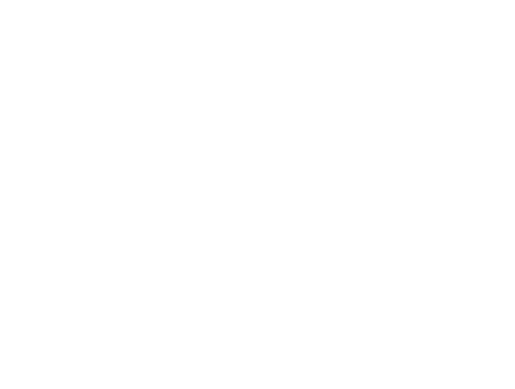

In [118]:
plt.axis('off')

In [119]:
plt.show()